In [2]:
# initial set-up
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple

In [11]:
# loan characteristics
original_balance = 5_000
coupon = 0.08
term = 3 * 12

# payments
periods = range(1, term + 1)
interest_payment = npf.ipmt(rate=coupon/12, per=periods, nper=term, pv=-original_balance)
principal_payment = npf.ppmt(rate=coupon/12, per=periods, nper=term, pv=-original_balance)

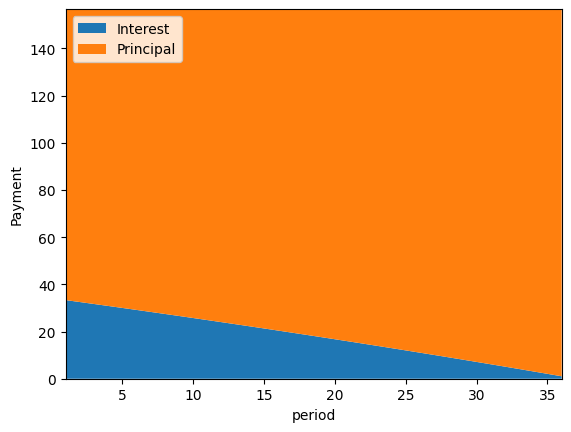

In [12]:
plt.stackplot(periods, interest_payment, principal_payment, labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("period")
plt.ylabel("Payment")
plt.margins(0,0)

In [8]:
# This is our total interest paid over the term of the loan.
sum(interest_payment)

2445.4457806414007

In [10]:
# pandas float formatting.
pd.options.display.float_format = '{:,.2f}'.format

# cash flow table
cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = original_balance - cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [original_balance] + list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 'Principal', 'Ending Balance']]
cf_table

,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"5,000.00",206.82,116.67,90.15,"4,909.85"
2,"4,909.85",206.82,114.56,92.25,"4,817.59"
3,"4,817.59",206.82,112.41,94.41,"4,723.19"
4,"4,723.19",206.82,110.21,96.61,"4,626.58"
5,"4,626.58",206.82,107.95,98.86,"4,527.71"
6,"4,527.71",206.82,105.65,101.17,"4,426.54"
7,"4,426.54",206.82,103.29,103.53,"4,323.01"
8,"4,323.01",206.82,100.87,105.95,"4,217.06"
9,"4,217.06",206.82,98.40,108.42,"4,108.64"
10,"4,108.64",206.82,95.87,110.95,"3,997.69"
